# Import libraries

In [1]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import scipy.stats as stats

# Generate sample

In [3]:
# Sample data from population which is linearly distributed

samples = 100
features = 1
lower_bound = 0
upper_bound = 1000
intercept = 10
coeffecients = [20]
sigma = 1000

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (100, 1)

 Shape of labels is:  (100,)


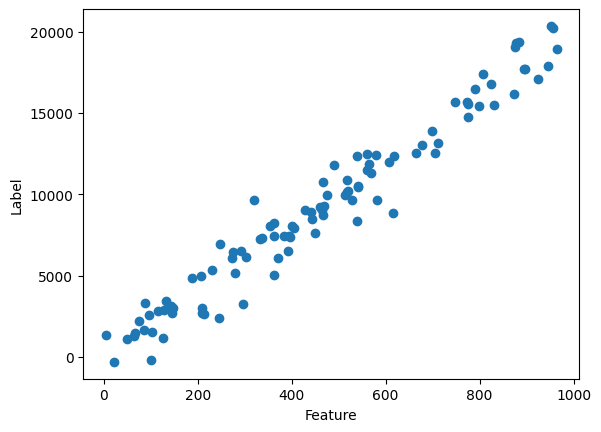

In [4]:
# Plot of samples - To verify linearity assumption

plt.scatter(X,y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.show()


# Train model

In [5]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2151.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.75e-68
Time:                        20:19:37   Log-Likelihood:                -844.12
No. Observations:                 100   AIC:                             1692.
Df Residuals:                      98   BIC:                             1697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4603    227.927     -0.059      0.953    -465.774     438.853
x1            19.9368      0.430     46.374      0.000      19.084      20.790
==============================================================================
Omnibus:                        3.242   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.626
Skew:                          -0.292   Prob(JB):                        0.269
Kurtosis:                       3.537   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prediction

In [77]:
X.shape

(100, 1)

Mean squared error is:  1257411.9582836179
Estimated standard deviation in errors is (Square root of mean squared error of fitted model):  114.42283857674293
Actual standard deviation in errors is:  1000


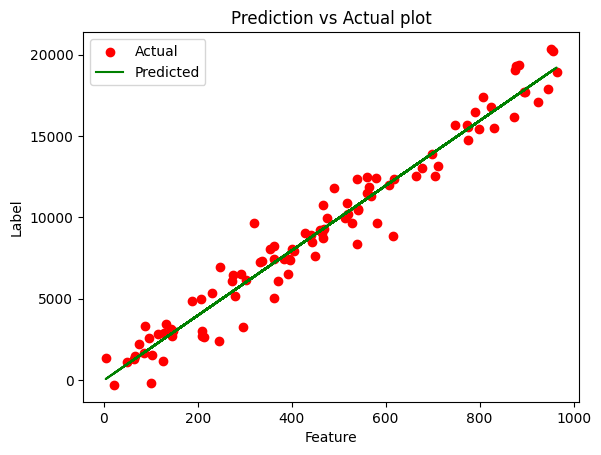

In [78]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is (Square root of mean squared error of fitted model): ",
      np.sqrt(len(y)*mean_squared_error)/(len(y)-X.shape[1]-1))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

plt.scatter(X,y,color='r',label='Actual')
plt.plot(X,y_pred,color='g',label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Prediction vs Actual plot")
plt.legend()
plt.show()


# Error plots

In [53]:
# Get leverage points and influence points in sample. These will be used to plot graphs.
# Leverage points - These are points (X) than are far away from mean (X_mean)
# Influence points - These are the points (X) which have large influence on the fit of the model.

influence = model_results.get_influence() 
leverage = influence.hat_matrix_diag 

In [74]:
(model_results.resid_pearson==errors_standardized).sum()
model_results.resid_pearson
(errors-np.mean(errors))/np.std(errors,ddof=2)
# (model_results.resid==errors).sum()
# np.std(errors)


array([ 4.60815862e-02, -1.39197470e+00,  1.80924202e+00, -2.65786824e-01,
        5.66312250e-01,  2.88968226e+00, -2.07300740e+00, -1.08516780e-01,
       -1.43110902e-01,  9.28492680e-01,  1.02274567e+00, -1.15618155e+00,
        4.50829982e-01,  1.41584443e+00, -1.09428439e+00, -6.20089236e-01,
       -1.25569237e-01,  8.92647909e-01, -2.27758015e-01, -9.41509942e-01,
       -8.63774371e-01, -2.33702403e-01,  6.91360743e-01,  4.65687072e-01,
        1.12290863e+00, -1.89836058e+00,  1.43713338e-01,  6.51330111e-01,
       -1.10768397e-01,  1.13333784e-01, -4.73128654e-01, -2.00789509e-01,
       -1.01682280e-01, -1.15676462e+00,  6.93809776e-02,  7.12368926e-01,
       -1.91963945e-03, -2.40527799e-02, -6.34797380e-01, -1.28144881e+00,
        5.65719813e-02,  1.26090970e-01, -1.73925808e+00,  2.89129458e-01,
        1.35106378e-01, -5.53868715e-02,  2.39107305e-01, -4.26390326e-01,
       -2.18226850e+00, -9.83588385e-01,  4.95731072e-01,  1.60638879e+00,
        2.68274479e-01,  

Min error is:  -3367.228395177759
Max error is:  3273.2249098167567
Mean of errors is:  0.0


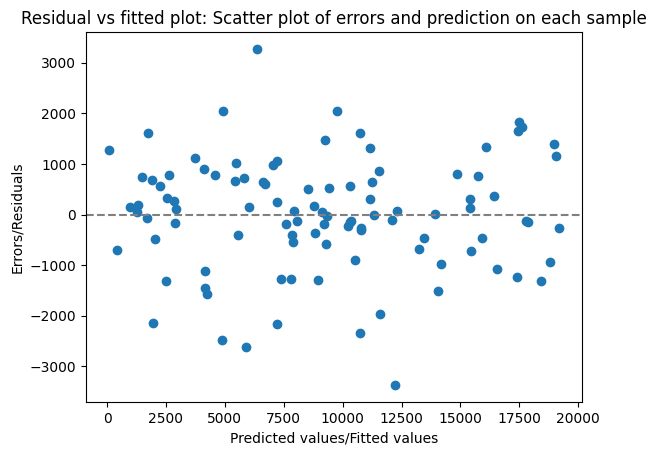

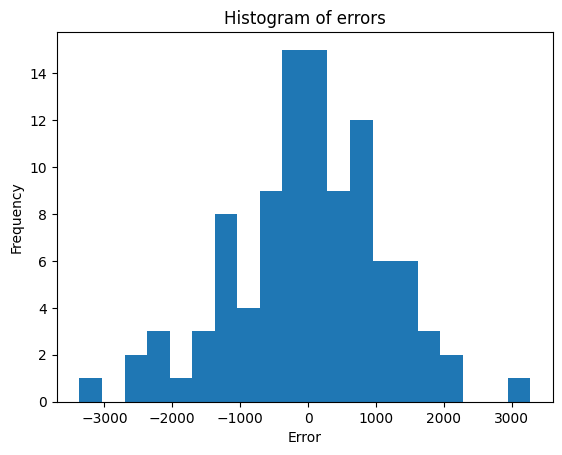

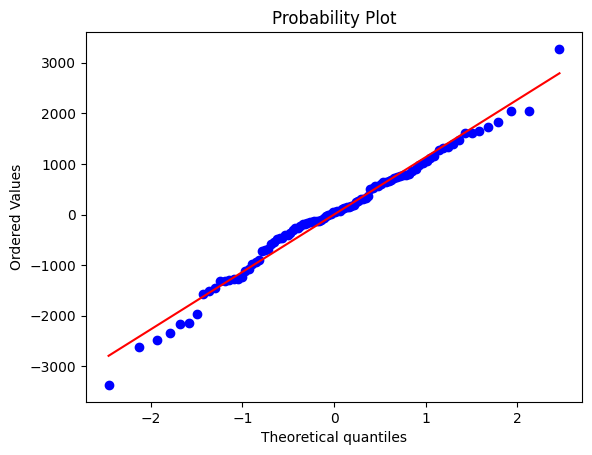

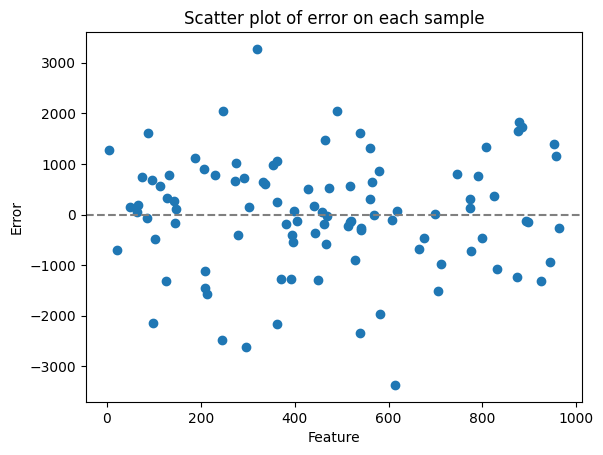

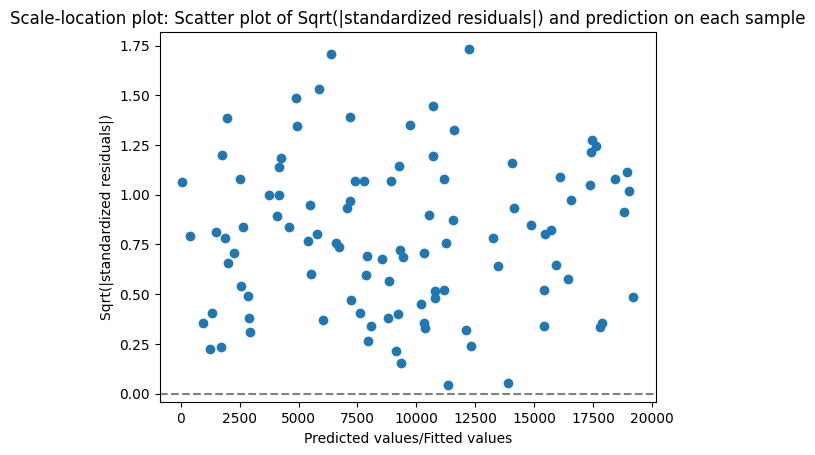

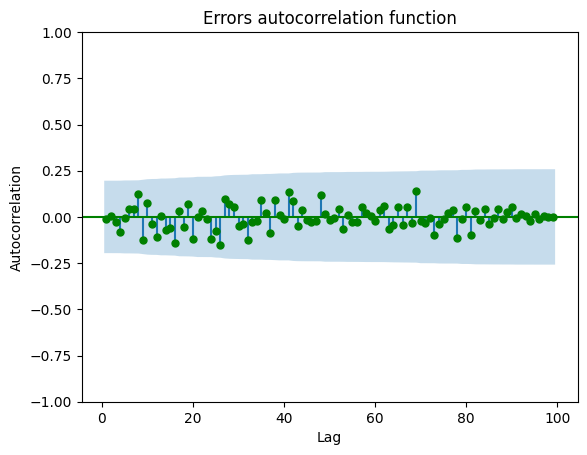

In [45]:
# Plot of errors

errors = y-y_pred
errors_standardized_abs_sqrt = np.sqrt(np.absolute((errors-np.mean(errors)))/np.std(errors))

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Residual vs fitted plot - To check linearity and homoscedasticity

plt.scatter(y_pred,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Errors/Residuals")
plt.title("Residual vs fitted plot: Scatter plot of errors and prediction on each sample")
plt.show()

# Histogram of errors - To check Normality

plt.hist(errors, bins=samples//5)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of errors")
plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 


# Error scatter plot - To check homoscedasticity

plt.scatter(X,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Feature")
plt.ylabel("Error")
plt.title("Scatter plot of error on each sample")
plt.show()

# Scale-location plot - To check homoscedasticity

plt.scatter(y_pred,errors_standardized_abs_sqrt)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Sqrt(|standardized residuals|)")
plt.title("Scale-location plot: Scatter plot of Sqrt(|standardized residuals|) and prediction on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Residual vs leverage plot: A leverage point (X) is one which is far away from the mean value (X_mean)
plt.scatter(leverage, stand_resids, ax=ax[1, 1]) 
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed') 
ax[1, 1].set_xlabel('Leverage') 
ax[1, 1].set_ylabel('Sqrt(standardized residuals)') 
ax[1, 1].set_title('Residuals vs Leverage Plot') 
